# Effective Energy of Gravitational Solitons by Feinstein
##  Geoff Cope
##  Univeristy of Utah
##  December 24, 2021 Christmas Eve!

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.35.3263

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
t,x,y,z,dt,dx,dy,dz,f,p = symbols('t x y z dt dx dy dz f p')

In [5]:
f = Function('f')(t,z)
f

In [6]:
p = Function('p')(t,z)
p

In [7]:
variables = Matrix( [t,x,y,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,dx,dy,dz] )
differentials

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [10]:
lineElement = expand(exp(f)*( -dt**2 + dz**2 ) + t* (exp(p)*dx**2 + exp(-p)*dy**2 ))
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  f(t, z)                                   ⎤
⎢-ℯ             0            0          0    ⎥
⎢                                            ⎥
⎢              p(t, z)                       ⎥
⎢    0      t⋅ℯ              0          0    ⎥
⎢                                            ⎥
⎢                          -p(t, z)          ⎥
⎢    0          0       t⋅ℯ             0    ⎥
⎢                                            ⎥
⎢                                     f(t, z)⎥
⎣    0          0            0       ℯ       ⎦

In [12]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡  f(t, z)                                   ⎤
⎢-ℯ             0            0          0    ⎥
⎢                                            ⎥
⎢              p(t, z)                       ⎥
⎢    0      t⋅ℯ              0          0    ⎥
⎢                                            ⎥
⎢                          -p(t, z)          ⎥
⎢    0          0       t⋅ℯ             0    ⎥
⎢                                            ⎥
⎢                                     f(t, z)⎥
⎣    0          0            0       ℯ       ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂                                                                                         
⎢⎢──(f(t, z))                                                                               
⎢⎢∂t                                                                                        
⎢⎢───────────                     0                                         0               
⎢⎢     2                                                                                    
⎢⎢                                                                                          
⎢⎢             ⎛  ∂              ⎞  -f(t, z) + p(t, z)                                      
⎢⎢             ⎜t⋅──(p(t, z)) + 1⎟⋅ℯ                                                        
⎢⎢             ⎝  ∂t             ⎠                                                          
⎢⎢     0       ───────────────────────────────────────                      0               
⎢⎢                                2                                   

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡   ⎛    2              2                         2⎞                                        
⎢ 2 ⎜   ∂              ∂             ⎛∂          ⎞ ⎟     ∂                                  
⎢t ⋅⎜- ───(f(t, z)) + ───(f(t, z)) - ⎜──(p(t, z))⎟ ⎟ + t⋅──(f(t, z)) + 1                    
⎢   ⎜    2              2            ⎝∂t         ⎠ ⎟     ∂t                                 
⎢   ⎝  ∂t             ∂z                           ⎠                                        
⎢───────────────────────────────────────────────────────────────────────                    
⎢                                     2                                                     
⎢                                  2⋅t                                                      
⎢                                                                                           
⎢                                                                         ⎛    2            
⎢                                                                     

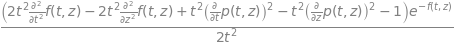

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡   ⎛    2              2                         2⎞                            ⎛       2   
⎢ 2 ⎜   ∂              ∂             ⎛∂          ⎞ ⎟     ∂                      ⎜   2  ∂    
⎢t ⋅⎜- ───(f(t, z)) + ───(f(t, z)) - ⎜──(p(t, z))⎟ ⎟ + t⋅──(f(t, z)) + 1   0.25⋅⎜2⋅t ⋅───(f(
⎢   ⎜    2              2            ⎝∂t         ⎠ ⎟     ∂t                     ⎜       2   
⎢   ⎝  ∂t             ∂z                           ⎠                            ⎝     ∂t    
⎢─────────────────────────────────────────────────────────────────────── + ─────────────────
⎢                                     2                                                     
⎢                                  2⋅t                                                      
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [23]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     